# Introduction
Context/ Source/ etc

#### Data dictionary

| Column Name | Description |
|:-----------:|:-----------:|
|  job_title | The job title or role associated with the reported salary. |
| experience_level | The level of experience of the individual.|
| employment_type | Indicates whether the employment is full-time, part-time, etc.|
| work_models | Describes different working models (remote, on-site, hybrid).|
| work_year | The specific year in which the salary information was recorded.|
| employee_residence | The residence location of the employee.|
| salary | The reported salary in the original currency.|
| salary_currency | The currency in which the salary is denominated.|
| salary_in_usd | The converted salary in US dollars.|
| company_location | The geographic location of the employing organization.|
| company_size | The size of the company, categorized by the number of employees.|

## Importing Libraries

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [20]:
df = pd.read_csv("data_science_salaries.csv")

# Dataset overview

##### Top 5 rows

In [21]:
df.head(5)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


### Dataset shape

In [22]:
print("This dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This dataset has 6599 rows and 11 columns


#### Quick dataset summary

In [26]:
column_summary = pd.DataFrame({
        'Total Rows': [len(df)] * df.shape[1],
        'Rows with Missing Values': df.isnull().sum(),
        'Unique Values': df.nunique(),
        'Contains Null Values': df.isna().any(),
        'Null Percentage': round((df.isnull().sum() / len(df)) * 100, 2),
        'Data Types': df.dtypes,
    })

print("Brief summary for each column:")
column_summary

Brief summary for each column:


,Total Rows,Rows with Missing Values,Unique Values,Contains Null Values,Null Percentage,Data Types
job_title,6599,0,132,False,0.0,object
experience_level,6599,0,4,False,0.0,object
employment_type,6599,0,4,False,0.0,object
work_models,6599,0,3,False,0.0,object
work_year,6599,0,5,False,0.0,int64
employee_residence,6599,0,87,False,0.0,object
salary,6599,0,1833,False,0.0,int64
salary_currency,6599,0,22,False,0.0,object
salary_in_usd,6599,0,2147,False,0.0,int64
company_location,6599,0,75,False,0.0,object


Since all the rows have the **salary_in_usd**, I'm going to use this column as the salary reference, dropping the **salary** and **salary_currency**. This way we will have a standarized value for the salaries.

In [37]:
# Dropping columns salary and salary_currency
df = df.drop(columns=["salary","salary_currency"])

KeyError: "['salary', 'salary_currency'] not found in axis"

# EDA

## Univariate Analysis

### Job Title

In [81]:
# Value counts for job titles (normalized)
df["job_title"].value_counts(normalize=True)

Data Engineer                0.198060
Data Scientist               0.188362
Data Analyst                 0.137900
Machine Learning Engineer    0.095317
Analytics Engineer           0.037278
                               ...   
Deep Learning Researcher     0.000152
Power BI Developer           0.000152
Marketing Data Scientist     0.000152
AI Product Manager           0.000152
Sales Data Analyst           0.000152
Name: job_title, Length: 132, dtype: float64

It seems that we have some job representing almost 20% of the job titles (like Data Engineer), while some represent less than 0.01% (like Sales Data Analyst).

In [82]:
# TODO
# Take this idea to the future section be able to explain how to get 90% of the titles
bora = df["job_title"].value_counts(normalize=True)
bora.head(25)
bora.head(30).values.sum()

0.9058948325503865

<Figure size 1440x360 with 0 Axes>

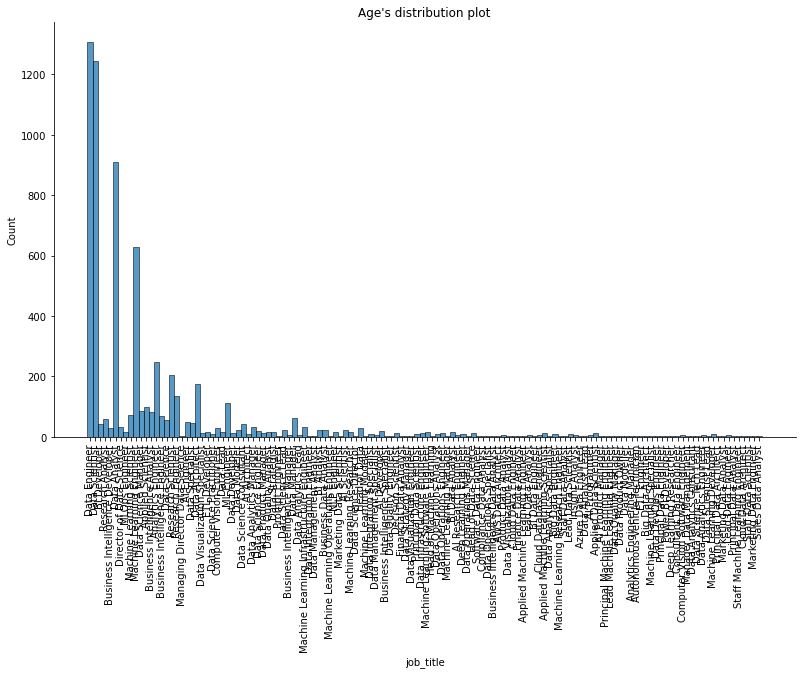

In [83]:
# Configuring plot figure size
plt.figure(figsize=(20,5))

# Selecting plot data and plotting type
graph = sns.displot(data=df, x="job_title", height=6.5, aspect=16/9)

# Setting plot's title
graph.set(title="Age's distribution plot")

# Rotating job titles on X axis
graph.set_xticklabels(rotation=90)